# Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Loading and Preprocessing the Data

In [2]:
df=pd.read_csv('EEG_data.csv')
data = pd.read_csv('demographic_info.csv')

In [3]:
data = data.rename(columns = {'subject ID': 'SubjectID'})
df = df.merge(data,how = 'inner',on = 'SubjectID')
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,Han Chinese,M
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,Han Chinese,M
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,Han Chinese,M
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,Han Chinese,M
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,Han Chinese,M


In [4]:
Data = df.copy()

In [5]:
Data.pop('SubjectID')
Data.pop('VideoID')
Data.pop('predefinedlabel')
Data.pop('user-definedlabeln')
Data.pop(' age')
Data.pop(' ethnicity')
Data.pop(' gender')
Data

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0
...,...,...,...,...,...,...,...,...,...,...,...
12806,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0
12807,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0
12808,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0
12809,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0


Normalizing

In [6]:
Data["Attention"] = Data["Attention"] / Data["Attention"].abs().max()
Data["Mediation"] = Data["Mediation"] / Data["Mediation"].abs().max()
Data["Raw"] = Data["Raw"] / Data["Raw"].abs().max()

In [7]:
x = np.array(Data)
y = np.array(df['user-definedlabeln'])

Splitting

In [8]:
x_train = x[:10000, :]
y_train = y[:10000]
x_test = x[10000:, :]
y_test = y[10000:]

# Implementing the Model and Training

In [14]:
base = LogisticRegression()
Model = AdaBoostClassifier(base_estimator=base, n_estimators=2000, learning_rate=0.0001)

In [15]:
Model.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=0.0001,
                   n_estimators=2000)

# Evaluation

In [16]:
y_hat = Model.predict(x_test)
y_hat2 = Model.predict(x_train)


For Test Set
F1 score:  0.43898968338669514
Accuracy:  0.43898968338669514
Precision:  0.43898968338669514
Recall:  0.43898968338669514
Confusion Matrix: 



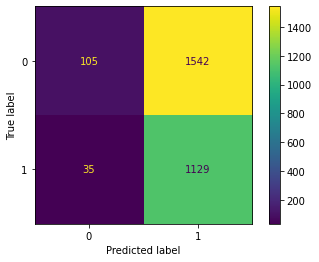


For Train Set
F1 score:  0.693243810323122
Accuracy:  0.5614
Precision:  0.5571669477234401
Recall:  0.9172681843420322
Confusion Matrix: 



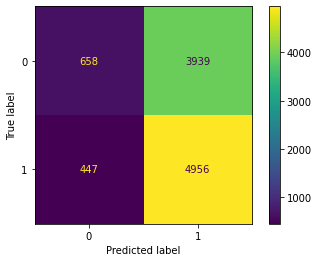

In [17]:
print('\nFor Test Set')
f1 = f1_score(y_test, y_hat, average='micro')
print('F1 score: ' , f1)

accuracy = accuracy_score(y_test, y_hat)
print('Accuracy: ' , accuracy)

precision = precision_score(y_test, y_hat, average='micro')
print('Precision: ' , precision)

recall = recall_score(y_test, y_hat, average='micro')
print('Recall: ' , recall)

matrix = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat))
print('Confusion Matrix: \n')
matrix.plot()
plt.show()

print('\nFor Train Set')
f1 = f1_score(y_train, y_hat2)
print('F1 score: ' , f1)

accuracy = accuracy_score(y_train, y_hat2)
print('Accuracy: ' , accuracy)

precision = precision_score(y_train, y_hat2)
print('Precision: ' , precision)

recall = recall_score(y_train, y_hat2)
print('Recall: ' , recall)

matrix =  ConfusionMatrixDisplay(confusion_matrix(y_train, y_hat2))
print('Confusion Matrix: \n')
matrix.plot()
plt.show()